In [2]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import time
import random
import pandas as pd

In [3]:
class Individual:
    def __init__(self, graph: nx.Graph, k: int, labels=None):
        self.graph = graph
        self.k = k
        self.labels = labels if labels is not None else self.initial_labels()
        self.fitness = self.calc_fitness()
        
    def initial_labels(self):
        return {node: random.randrange(self.k) for node in self.graph.nodes()}
    
    def calc_fitness(self):
        total = 0
        for u, v, data in self.graph.edges(data=True):
            if self.labels[u] != self.labels[v]:
                total += data.get("weight", 1)
        return total


In [4]:
def crossover(parent1, parent2):
    child_labels = {}
    for node in parent1.labels:
        child_labels[node] = parent1.labels[node] if random.random() < 0.5 else parent2.labels[node]
    
    child = Individual(parent1.graph, parent1.k,child_labels)  
    child.fitness = child.calc_fitness()
    
    return child

In [5]:
def mutation(individual, mutation_prob):
    if random.random() < mutation_prob:
        node = random.choice(list(individual.labels.keys()))
        
        current_label = individual.labels[node]
        labels = list(range(individual.k))
        new_label = random.choice(labels)
        
        if new_label != current_label:
            individual.labels[node] = new_label
        
        
        individual.fitness = individual.calc_fitness()


In [6]:
def ga(graph: nx.Graph, k, population_size, num_generations, tournament_size, elitism_size, mutation_prob):
    population = [Individual(graph, k) for _ in range(population_size)]
    
    for _ in range(num_generations):
        population.sort(key=lambda x: x.fitness, reverse=True)
        elites = population[:elitism_size]
        offspring = []
        
        for _ in range(population_size - elitism_size):
            parent1 = tournament_selection(population, tournament_size)
            parent2 = tournament_selection(population, tournament_size)
            child = crossover(parent1, parent2)
            mutation(child, mutation_prob)
            offspring.append(child)
        
        population = elites + offspring
    
    best_solution = max(population, key=lambda x: x.fitness)
    return best_solution

In [7]:
def tournament_selection(population, tournament_size):
    tournament = random.sample(population, tournament_size)
    return max(tournament, key=lambda x: x.fitness)


In [8]:
def format_time(seconds):
    return "{:.10f}".format(seconds)

In [9]:
def plot_graph(graph, colors):
   
    G = nx.Graph(graph)
    node_colors = []
    for node in G.nodes():
        try:
            node_colors.append(colors[node])
        except KeyError:
            print("Čvor", node, "nema dodeljenu grupu.")
            node_colors.append('gray')  # nedodeljeni čvorovi sivi

    nx.draw(G, with_labels=True,
            node_color=node_colors,
            cmap=plt.cm.rainbow,
            node_size=500)
    
    plt.show()

=== PRIMER 1 ===
Najbolja vrednost preseka (GA): 8
Podela čvorova: {'A': 1, 'B': 0, 'C': 2, 'D': 0, 'E': 1, 'F': 0, 'G': 1}
Vreme: 0.2231826782 sekundi


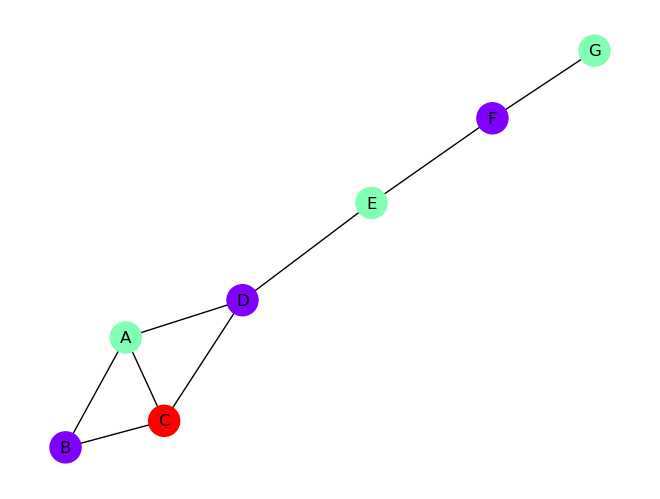

In [10]:
graph1 = {
    'A': ['B','C','D'],
    'B': ['A','C'],
    'C': ['A','B','D'],
    'D': ['A','C','E'],
    'E': ['D','F'],
    'F': ['E','G'],
    'G': ['F']
}

G1 = nx.Graph(graph1)
for u, v in G1.edges():
    G1.edges[u, v]['weight'] = 1

k = 3
population_size = 50
num_generations = 200
tournament_size = 3
elitism_size = 2
mutation_prob = 0.1

start_time = time.time()
best= ga(G1, k, population_size, num_generations,
          tournament_size, elitism_size, mutation_prob)
end_time = time.time()

print("=== PRIMER 1 ===")
print("Najbolja vrednost preseka (GA):", best.fitness)
print("Podela čvorova:", best.labels)
print("Vreme:", format_time(end_time - start_time), "sekundi")


plot_graph(G1, best.labels)


=== PRIMER 2 ===
Najbolja vrednost preseka (GA): 15
Podela čvorova: {'A': 1, 'B': 2, 'C': 0, 'D': 1}
Vreme: 0.1893529892 sekundi


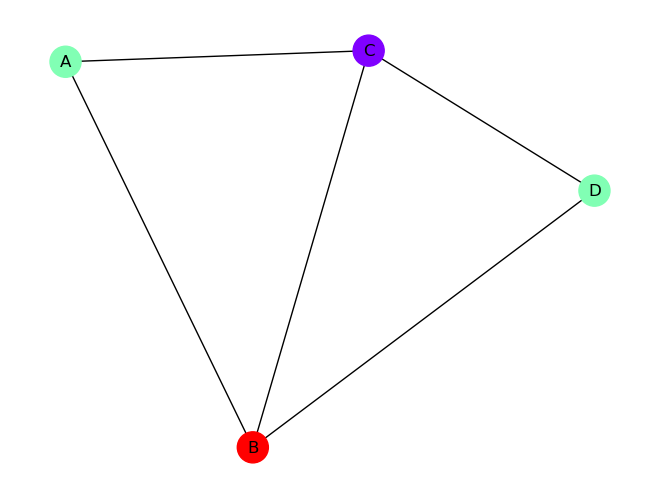

In [11]:
G2 = nx.Graph()
G2.add_edge('A','B', weight=3)
G2.add_edge('A','C', weight=2)
G2.add_edge('B','C', weight=5)
G2.add_edge('C','D', weight=4)
G2.add_edge('B','D', weight=1)

k = 3  
population_size = 50
num_generations = 200
tournament_size = 3
elitism_size = 2
mutation_prob = 0.1

start_time = time.time()
best = ga(G2, k, population_size, num_generations,
                 tournament_size, elitism_size, mutation_prob)
end_time = time.time()

print("=== PRIMER 2 ===")
print("Najbolja vrednost preseka (GA):", best.fitness)
print("Podela čvorova:", best.labels)
print("Vreme:", format_time(end_time - start_time), "sekundi")




plot_graph(G2, best.labels)

In [12]:
n = 30 
filename = f"testiranje/graph_{n}.edgelist"
G3 = nx.read_weighted_edgelist(filename, nodetype=int)

=== PRIMER 3 ===
Najbolja vrednost preseka (GA): 496.0
Podela čvorova: {0: 1, 3: 2, 14: 2, 15: 0, 22: 2, 23: 0, 1: 1, 9: 2, 17: 1, 4: 1, 6: 0, 12: 0, 20: 2, 26: 0, 29: 0, 16: 1, 27: 2, 28: 2, 5: 2, 19: 0, 24: 1, 25: 1, 11: 1, 13: 2, 18: 1, 7: 2, 8: 2, 21: 2, 10: 1}
Vreme: 0.9191958904 sekundi


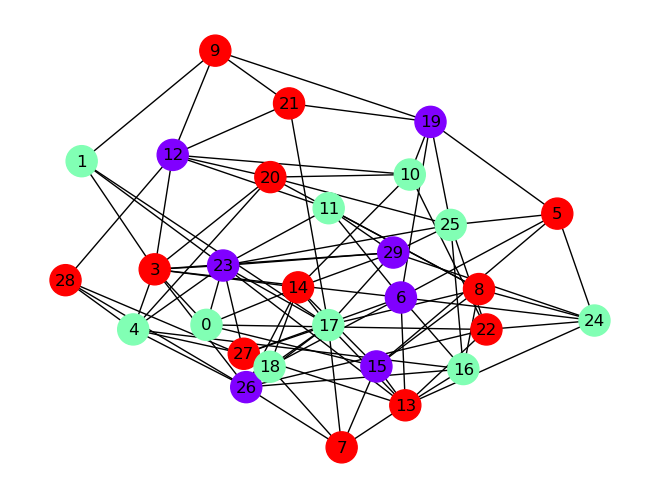

In [13]:
start_time = time.time()
best = ga(G3, k, population_size, num_generations,
                 tournament_size, elitism_size, mutation_prob)
end_time = time.time()

print("=== PRIMER 3 ===")
print("Najbolja vrednost preseka (GA):", best.fitness)
print("Podela čvorova:", best.labels)
print("Vreme:", format_time(end_time - start_time), "sekundi")



plot_graph(G3, best.labels)

In [14]:
n = 50  
filename = f"testiranje/graph_{n}.edgelist"
G4 = nx.read_weighted_edgelist(filename, nodetype=int)

=== PRIMER 4 ===
Najbolja vrednost preseka (GA): 1118.0
Podela čvorova: {0: 0, 7: 2, 10: 0, 11: 2, 15: 1, 32: 1, 1: 2, 3: 0, 6: 2, 9: 0, 19: 1, 20: 0, 23: 0, 26: 0, 37: 1, 40: 0, 49: 0, 2: 2, 4: 0, 5: 1, 16: 0, 21: 0, 30: 1, 31: 0, 36: 0, 38: 1, 8: 0, 22: 0, 25: 2, 35: 2, 39: 1, 47: 1, 41: 2, 12: 2, 46: 2, 14: 0, 17: 1, 28: 1, 29: 0, 42: 2, 34: 1, 44: 1, 48: 0, 13: 1, 24: 2, 27: 2, 33: 2, 18: 1, 45: 2, 43: 2}
Vreme: 2.0036802292 sekundi


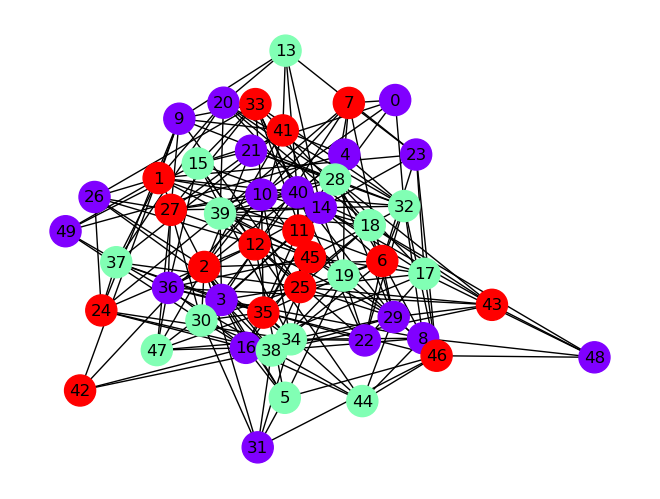

In [15]:
start_time = time.time()
best = ga(G4, k, population_size, num_generations,
                 tournament_size, elitism_size, mutation_prob)
end_time = time.time()

print("=== PRIMER 4 ===")
print("Najbolja vrednost preseka (GA):", best.fitness)
print("Podela čvorova:", best.labels)
print("Vreme:", format_time(end_time - start_time), "sekundi")


plot_graph(G4, best.labels)

In [16]:
n = 100  
filename = f"testiranje/graph_{n}.edgelist"
G5 = nx.read_weighted_edgelist(filename, nodetype=int)

=== PRIMER 5 ===
Najbolja vrednost preseka (GA): 4372.0
Podela čvorova: {0: 2, 1: 0, 9: 1, 11: 1, 18: 0, 19: 1, 28: 0, 30: 0, 31: 1, 35: 1, 42: 1, 68: 2, 71: 1, 74: 0, 75: 2, 84: 0, 85: 2, 86: 2, 99: 2, 4: 2, 5: 2, 7: 0, 8: 1, 10: 2, 21: 0, 40: 0, 41: 0, 51: 2, 53: 1, 57: 1, 59: 2, 63: 2, 67: 2, 73: 1, 76: 1, 88: 1, 89: 0, 90: 1, 91: 2, 93: 2, 96: 1, 2: 1, 22: 0, 24: 2, 32: 0, 37: 1, 44: 2, 50: 0, 64: 0, 66: 2, 69: 2, 72: 0, 77: 1, 87: 0, 97: 0, 3: 0, 23: 2, 25: 1, 26: 0, 45: 0, 60: 1, 83: 2, 14: 1, 29: 0, 34: 1, 62: 1, 95: 1, 33: 0, 36: 0, 49: 0, 52: 2, 56: 2, 82: 1, 92: 0, 6: 1, 54: 0, 70: 2, 79: 0, 15: 2, 39: 2, 58: 1, 61: 2, 38: 0, 46: 1, 65: 1, 78: 1, 16: 0, 81: 0, 17: 1, 27: 0, 94: 0, 55: 2, 12: 0, 13: 0, 43: 2, 47: 0, 80: 2, 20: 2, 98: 1, 48: 2}
Vreme: 7.4946889877 sekundi


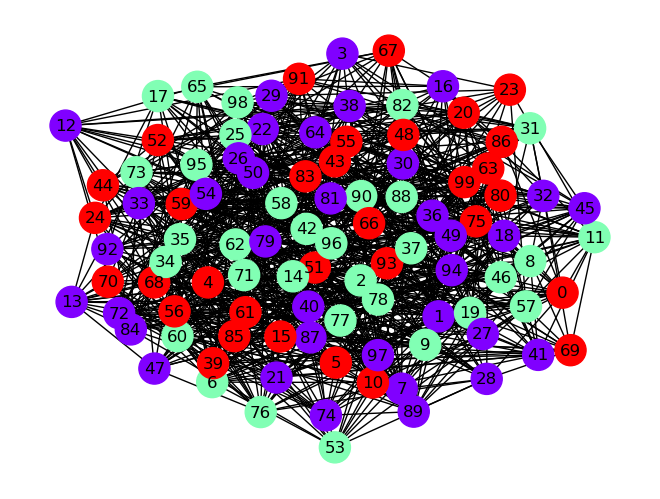

In [17]:
start_time = time.time()
best = ga(G5, k, population_size, num_generations,
                 tournament_size, elitism_size, mutation_prob)
end_time = time.time()

print("=== PRIMER 5 ===")
print("Najbolja vrednost preseka (GA):", best.fitness)
print("Podela čvorova:", best.labels)
print("Vreme:", format_time(end_time - start_time), "sekundi")

plot_graph(G5, best.labels)

In [18]:
n = 200
filename = f"testiranje/graph_{n}.edgelist"
G6 = nx.read_weighted_edgelist(filename, nodetype=int)

=== PRIMER 6 ===
Najbolja vrednost preseka (GA): 17082.0
Podela čvorova: {0: 0, 1: 0, 4: 2, 7: 2, 9: 2, 10: 2, 13: 2, 18: 2, 23: 0, 24: 2, 25: 1, 30: 2, 35: 1, 47: 2, 57: 1, 61: 0, 63: 2, 69: 0, 70: 1, 77: 2, 80: 0, 84: 2, 85: 2, 89: 1, 90: 2, 91: 2, 92: 2, 95: 1, 100: 1, 102: 2, 105: 1, 106: 1, 109: 2, 111: 2, 113: 1, 114: 0, 126: 2, 129: 1, 135: 0, 136: 2, 140: 1, 141: 1, 144: 1, 148: 1, 151: 0, 158: 0, 161: 0, 173: 0, 180: 1, 181: 1, 188: 2, 27: 2, 28: 1, 31: 2, 34: 0, 37: 2, 38: 0, 39: 1, 54: 1, 55: 2, 64: 1, 66: 2, 67: 1, 72: 2, 75: 1, 79: 0, 96: 1, 99: 2, 103: 0, 107: 1, 115: 1, 118: 1, 128: 1, 132: 0, 143: 2, 147: 2, 162: 2, 166: 2, 169: 0, 172: 2, 176: 1, 177: 2, 182: 0, 183: 0, 184: 0, 194: 0, 195: 1, 199: 2, 2: 1, 16: 1, 17: 0, 20: 0, 40: 0, 44: 1, 53: 1, 76: 1, 82: 0, 97: 0, 98: 0, 108: 0, 119: 2, 131: 1, 145: 1, 150: 0, 152: 0, 153: 2, 159: 2, 163: 2, 178: 0, 187: 0, 3: 0, 19: 1, 21: 1, 32: 0, 36: 0, 58: 2, 68: 1, 94: 1, 122: 0, 123: 1, 125: 1, 149: 1, 155: 2, 164: 2, 170: 

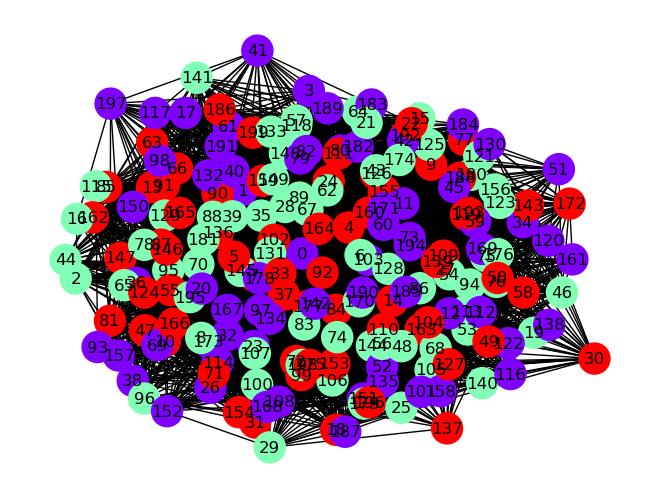

In [19]:
start_time = time.time()
best = ga(G6, k, population_size, num_generations,
                 tournament_size, elitism_size, mutation_prob)
end_time = time.time()

print("=== PRIMER 6 ===")
print("Najbolja vrednost preseka (GA):", best.fitness)
print("Podela čvorova:", best.labels)
print("Vreme:", format_time(end_time - start_time), "sekundi")



plot_graph(G6, best.labels)

In [20]:
n = 250  
filename = f"testiranje/graph_{n}.edgelist"
G7 = nx.read_weighted_edgelist(filename, nodetype=int)

=== PRIMER 7 ===
Najbolja vrednost preseka (GA): 25486.0
Podela čvorova: {0: 1, 4: 0, 5: 2, 7: 1, 16: 2, 19: 0, 51: 1, 58: 2, 59: 0, 60: 2, 64: 2, 65: 2, 67: 1, 70: 2, 75: 2, 77: 2, 83: 2, 85: 0, 89: 0, 94: 2, 95: 0, 110: 1, 111: 2, 116: 1, 119: 2, 121: 1, 125: 1, 126: 2, 132: 0, 134: 2, 138: 0, 141: 0, 146: 2, 149: 0, 150: 0, 158: 0, 159: 0, 167: 1, 171: 1, 178: 0, 181: 2, 183: 1, 185: 1, 186: 2, 190: 0, 191: 0, 192: 0, 195: 1, 199: 1, 214: 2, 218: 1, 221: 2, 235: 0, 238: 0, 240: 0, 243: 2, 248: 2, 1: 0, 10: 2, 12: 1, 13: 0, 31: 1, 34: 1, 40: 0, 48: 1, 52: 1, 57: 1, 61: 1, 68: 1, 71: 2, 72: 0, 84: 2, 87: 0, 97: 1, 107: 0, 108: 1, 118: 1, 122: 1, 133: 1, 142: 1, 148: 2, 153: 0, 164: 2, 173: 0, 180: 2, 188: 0, 194: 0, 201: 1, 202: 1, 206: 1, 220: 2, 228: 0, 241: 2, 249: 1, 2: 2, 22: 1, 25: 1, 37: 0, 39: 1, 43: 2, 44: 2, 45: 1, 54: 1, 63: 0, 66: 2, 74: 2, 76: 2, 80: 2, 88: 1, 93: 1, 101: 1, 112: 2, 113: 2, 114: 2, 127: 1, 128: 2, 145: 2, 152: 1, 155: 1, 163: 0, 176: 2, 177: 0, 189: 1, 19

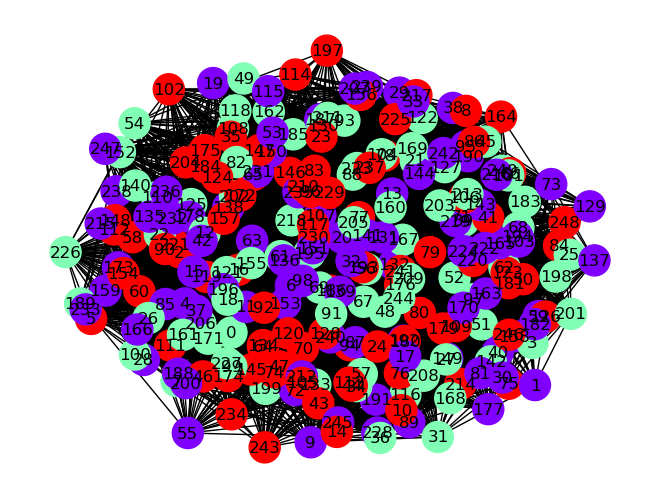

In [21]:
start_time = time.time()
best = ga(G7, k, population_size, num_generations,
                 tournament_size, elitism_size, mutation_prob)
end_time = time.time()

print("=== PRIMER 7 ===")
print("Najbolja vrednost preseka (GA):", best.fitness)
print("Podela čvorova:", best.labels)
print("Vreme:", format_time(end_time - start_time), "sekundi")


plot_graph(G7, best.labels)

In [22]:
n = 350  
filename = f"testiranje/graph_{n}.edgelist"
G8 = nx.read_weighted_edgelist(filename, nodetype=int)

=== PRIMER 8 ===
Najbolja vrednost preseka (GA): 49316.0
Podela čvorova: {0: 2, 8: 1, 27: 2, 35: 1, 36: 1, 39: 1, 44: 2, 53: 1, 56: 1, 64: 2, 65: 1, 73: 1, 76: 2, 84: 2, 86: 1, 87: 2, 91: 0, 94: 0, 95: 0, 97: 1, 105: 1, 107: 0, 112: 1, 114: 2, 116: 0, 125: 1, 127: 1, 130: 1, 139: 0, 142: 1, 149: 0, 150: 1, 165: 1, 186: 0, 194: 1, 203: 0, 209: 0, 218: 2, 222: 1, 223: 2, 224: 1, 239: 1, 244: 2, 245: 1, 248: 1, 250: 2, 258: 0, 259: 0, 273: 0, 279: 2, 282: 1, 290: 1, 291: 1, 292: 1, 297: 0, 306: 1, 308: 2, 310: 2, 312: 0, 322: 1, 323: 1, 333: 2, 344: 0, 348: 0, 1: 0, 18: 0, 20: 1, 24: 1, 38: 0, 50: 1, 52: 0, 75: 2, 79: 0, 80: 2, 83: 2, 85: 0, 110: 0, 113: 1, 124: 1, 135: 1, 137: 2, 143: 2, 153: 0, 154: 2, 160: 1, 162: 0, 169: 2, 171: 0, 175: 1, 176: 2, 183: 0, 185: 2, 187: 1, 188: 0, 191: 0, 196: 2, 199: 2, 202: 2, 204: 1, 213: 1, 220: 1, 221: 1, 227: 2, 232: 1, 241: 2, 242: 2, 247: 0, 249: 1, 260: 0, 265: 0, 268: 1, 272: 1, 274: 0, 276: 2, 277: 1, 280: 2, 285: 1, 303: 1, 304: 2, 319: 0, 3

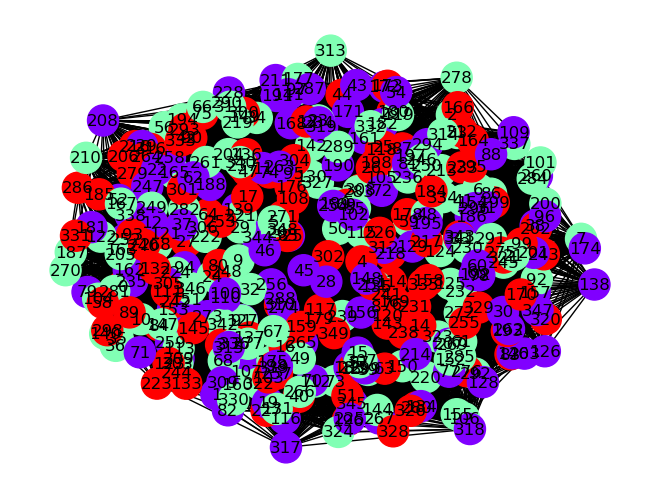

In [23]:
start_time = time.time()
best = ga(G8, k, population_size, num_generations,
                 tournament_size, elitism_size, mutation_prob)
end_time = time.time()

print("=== PRIMER 8 ===")
print("Najbolja vrednost preseka (GA):", best.fitness)
print("Podela čvorova:", best.labels)
print("Vreme:", format_time(end_time - start_time), "sekundi")

plot_graph(G8, best.labels)

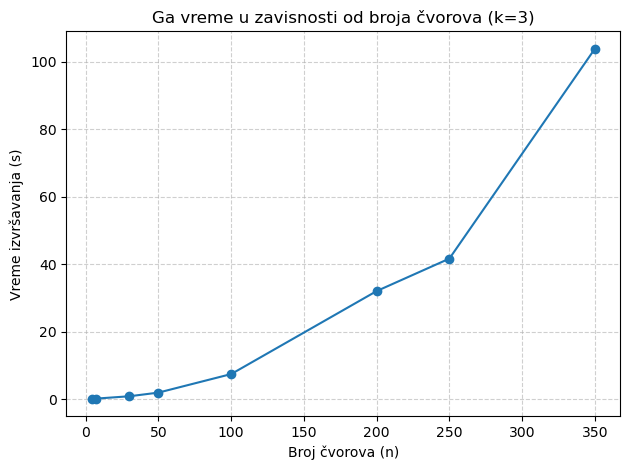

In [25]:
n_values = [4, 7,30,50,100,200,250,350]
times = [0.1894,0.2231,0.9192,2.0037,7.4947,32.0654,41.6805,103.7946]  
plt.plot(n_values, times, marker='o')
plt.xlabel("Broj čvorova (n)")
plt.ylabel("Vreme izvršavanja (s)")
plt.title("Ga vreme u zavisnosti od broja čvorova (k=3)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [26]:
df = pd.DataFrame({
    "Broj čvorova (n)": n_values,
    "Vreme izvršavanja (s)": times
})
df


,Broj čvorova (n),Vreme izvršavanja (s)
0,4,0.1894
1,7,0.2231
2,30,0.9192
3,50,2.0037
4,100,7.4947
5,200,32.0654
6,250,41.6805
7,350,103.7946
